In [1]:
#librariile folosite pentru rezolvare
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm
from sklearn import preprocessing
from sklearn import metrics
import pdb
import math
import pandas as pd
import os
import csv
from sklearn.model_selection import train_test_split

dataPath = "/Users/cmrra/Documents/PythonML/ProiectML/"

In [2]:
#citesc label-urile de training cu panda
train_labels = pd.read_csv(dataPath + "train_labels.csv",header=None)
train_labels.head()
#train_labels.shape

,0,1
0,id,class
1,10003,7
2,10005,13
3,10006,6
4,10007,1


In [3]:
#conversie in np array
np_train_labels = np.array(train_labels)
print(np_train_labels)

[['id' 'class']
 ['10003' '7']
 ['10005' '13']
 ...
 ['23996' '3']
 ['23997' '3']
 ['23999' '18']]


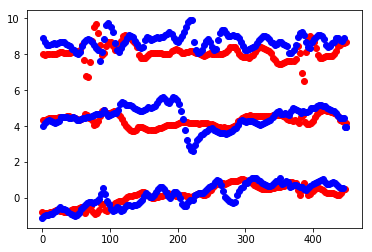

In [10]:
#citirea datelor de training si te test
train_data_lines = []
for root, dirs, files in os.walk(dataPath +"train/"):
    for x in files:
        train_data = np.array(pd.read_csv(dataPath + "train/" +x, header=None))
        avgx = train_data[:][0].mean()
        avgy = train_data[:][1].mean()
        avgz = train_data[:][2].mean()
        for i in range(train_data.shape[0],150):   # adaug elemente pana ajung la dimensiunea dorita
            train_data = np.concatenate(
                (train_data,
                 [[avgx,avgy,avgz]]
                ),axis=0)            
        train_data = train_data.flatten()
        train_data_lines.append(train_data[:450])
train_data_lines = np.array(train_data_lines)
plt.plot(train_data_lines[0],"ro")
plt.plot(train_data_lines[1],"bo")

[[-0.320224    4.966173    7.307702   ...  0.429161    4.543596
   8.509591  ]
 [-0.654216    3.795408    8.034343   ...  3.72517833  3.898359
   3.86424167]
 [-0.563835    4.702811    8.301894   ... -1.465251    3.43149
   9.03452   ]
 ...
 [ 0.283713    5.707178    6.952762   ...  0.419584    4.325724
   7.018602  ]
 [-1.40779     4.279635    8.316858   ... -0.077812    5.069124
   8.081029  ]
 [-0.0413      3.331532    9.76116    ... -1.177947    3.728371
   8.290522  ]]


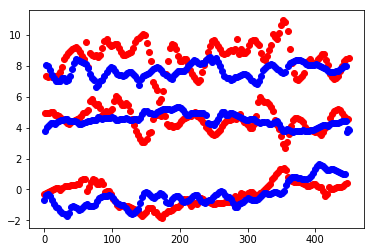

In [5]:
test_data_lines = []
for root, dirs, files in os.walk(dataPath +"test/"):
    testedFiles = files
    for x in files:
        test_data = np.array(pd.read_csv(dataPath + "test/" +x, header=None))
        #calculez media pentru a o adauga in cazul in care lipsesc feature-uri
        avgx = test_data[:][0].mean()
        avgy = test_data[:][1].mean()
        avgz = test_data[:][2].mean()
        for i in range(test_data.shape[0],150):   # adaug elemente pana ajung la dimensiunea dorita
            test_data = np.concatenate(
                (test_data,
                 [[avgx,avgy,avgz]])
                ,axis=0)            
        test_data = test_data.flatten()
        test_data_lines.append(test_data[:450])
test_data_lines = np.array(test_data_lines)
print(test_data_lines)

plt.plot(test_data_lines[0],"ro")
plt.plot(test_data_lines[1],"bo")

In [6]:
filesGood = []
for x in testedFiles:
    filesGood.append(x.replace('.csv',''))

5000


In [7]:
#sterg prima linie care contine text
print(train_labels.shape,type(train_labels))
if np_train_labels[0][0] == 'id':
    np_train_labels = np.delete(np_train_labels, 0, 0)
print(np_train_labels)

(9001, 2) <class 'pandas.core.frame.DataFrame'>
[['10003' '7']
 ['10005' '13']
 ['10006' '6']
 ...
 ['23996' '3']
 ['23997' '3']
 ['23999' '18']]


In [8]:
#functiile folosite pentru normalizarea datei. Cea mai eficienta pentru
#ce am folosit eu este standard
def normalize_data(train_data, test_data, type):
    if type == 'standard':
        scaler = preprocessing.StandardScaler()
        scaler.fit(train_data)
        train_data = scaler.transform(train_data)
        test_data = scaler.transform(test_data)
        return train_data, test_data
    elif type == 'min_max':
        min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
        min_max_scaler.fit(train_data)
        train_data = min_max_scaler.transform(train_data)
        test_data = min_max_scaler.transform(test_data)
        return train_data, test_data
    elif type == 'l1':
        train_data /= np.sum(abs(train_data), axis=1, keepdims=True)
        test_data /= np.sum(abs(test_data), axis=1, keepdims=True)
        return train_data, test_data
    elif type == 'l2':
        train_data /= np.sqrt(np.sum((train_data) ** 2, axis=1, keepdims=True))
        test_data /= np.sqrt(np.sum((test_data) ** 2, axis=1, keepdims=True))
        return train_data, test_data
#svm-ul folosit pentru antrenare
def svm_classifier(train_data, train_labels, test_data, c):
#     linear_svm_model = svm.SVC(C=c, kernel='linear')
#     linear_svm_model = svm.SVC(C=c, kernel='poly',degree = 10)
#     linear_svm_model = svm.SVC(C=c, kernel='rbf') # best pe standard
#     linear_svm_model = svm.SVC(C=c, kernel ='sigmoid')   
    linear_svm_model = svm.SVC(C=c, gamma='scale')

    linear_svm_model.fit(train_data, train_labels)

    predicted_labels_train = linear_svm_model.predict(train_data)
    predicted_labels_test = linear_svm_model.predict(test_data)
    
    return predicted_labels_train, predicted_labels_test

In [14]:
#cum arata matricile 2D ale datelor de test si training
train_data_lines.shape
test_data_lines.shape

(5000, 450)

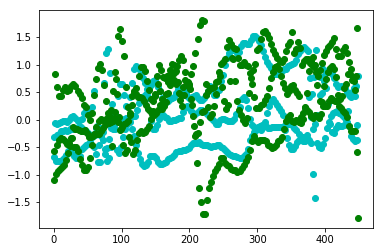

In [15]:
#vizualizarea datelor dupa normalizare
scaled_train_data, scaled_test_data = normalize_data(train_data_lines, test_data_lines,'standard')
plt.plot(scaled_train_data[0],"co")
plt.plot(scaled_train_data[1],"go")

In [16]:
#Antrenare pe toate datele de training + predict pe test
accuracies_train = []
accuracies_test = []
Cs=[9.1]
for c in Cs:
    predicted_labels_train, predicted_labels_test = svm_classifier(
        scaled_train_data,
        np_train_labels[0:9000,[1]].flatten(),
        scaled_test_data,
        c)
    acc_train = metrics.accuracy_score(np_train_labels[0:9000,[1]],predicted_labels_train)
    accuracies_train.append(acc_train)
print(accuracies_train)
print(predicted_labels_test[0:15])

[0.998]
['3' '10' '5' '20' '13' '13' '9' '4' '5' '3' '16' '9' '10' '13' '17']


In [17]:
## antrenare pe 80% din training si testare pe 20% 
# sau kfolding pe 5
from sklearn.model_selection import KFold

accuracies_train = []
accuracies_test = []

# kf = KFold(5,True,1)
## kf.get_n_splits(scaled_train_data)
#cross validation
# for train_index, test_index in kf.split(scaled_train_data):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = scaled_train_data[train_index], scaled_train_data[test_index]
#     y_train, y_test = np_train_labels[train_index,[1]], np_train_labels[test_index,[1]]

Cs=[9,9.1,9.3] 
for c in Cs:
    predicted_labels_train, predicted_labels_test = svm_classifier(
        scaled_train_data[:7200],
        np_train_labels[:7200,[1]].flatten(),
        scaled_train_data[7200:9000],
        c)
    acc_test =metrics.accuracy_score(np_train_labels[7200:9000,[1]].flatten(),predicted_labels_test)
    
    print(metrics.confusion_matrix(np_train_labels[7200:9000,[1]],predicted_labels_test))
    
    acc_train = metrics.accuracy_score(np_train_labels[0:7200,[1]],predicted_labels_train)
    
    accuracies_train.append( acc_train )
    print(c," | train acc = ",acc_train, " | test acc = ", acc_test)
    accuracies_train.append(acc_train)
print(accuracies_train)

[[ 70   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   6
    0   0]
 [  0  96   0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0
    0   0]
 [  0   0  89   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0  65   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0  79   0   0   0   5   0   3   0   1   3   0   3   0   0
    0   3]
 [  0   0   0   0   0  89   0   0   0   0   0   0   0   0   0   0   0   0
    1   0]
 [  0   1   0   0   0   0  75   0   0   0   0   2   0   0   0   0   1   0
    0   0]
 [  0   0   0   0   0   0   0  86   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   2   0   0   0  85   0   1   0   0   1   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0  96   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   2   0   0   0   6   0  81   0   0   5   0   0   0   0
    0   1]
 [  0   8   0   0   0   0   3   0   0   0   0  72   0   0   3   0

In [13]:
#scrierea in fisier a predict-ului dat de alg.
print(dataPath)
print(len(predicted_labels_test))
with open(dataPath + 'fill_with_avg_150Vals_c9.1_sweetspot.csv', mode='w', newline='') as sm:
    writer = csv.writer(sm, delimiter=',')
    writer.writerow(['id', 'class'])
    for i in range(5000):
        writer.writerow([filesGood[i],predicted_labels_test[i]])

/Users/cmrra/Documents/PythonML/ProiectML/


NameError: name 'predicted_labels_test' is not defined